# Examples of K-means clustering
#### by Elizabeth Barnes

Examples of running k-means clustering analysis.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans,vq
import matplotlib.cm as cm

import importlib
import general_functions as gf
importlib.reload(gf)
gf.add_parent_dir_to_path()

from lib import class_general_functions as cgf
importlib.reload(cgf)

#.............................................
# PLOTTING COMMANDS
#.............................................
gf.cc()
plt.ioff()

### Get your data together
For this example I will be using random data who's coordinates I draw from uniform distributions. However, I am going to actually make my data have clusters in it, specifically, 6 clusters. Then I will see how k-means does picking them out.

In [2]:
# define a function to help me quickly grab 100 random variables from a uniform distribution between (R1,R2).
# this just makes my life easier later.
def init_board(N,R1,R2):
    X = np.array([(np.random.uniform(R1, R2), np.random.uniform(R1, R2)) for i in range(N)])
    return X

Now I loop through and make seven different data sets with noise, and combine them together to make my data set M.

In [3]:
M = np.empty((0,2)) # matrix of data

for i in np.arange(0,7,1):
    randval1 = np.random.uniform(-1,1)
    randval2 = np.random.uniform(-1,1)
    
    R1 = -1. + randval1*1.
    R2 = 1. + randval2*1.
    M = np.append(M,init_board(100,R1,R2), axis = 0)

Now I plot my data M. It just looks like a mess.

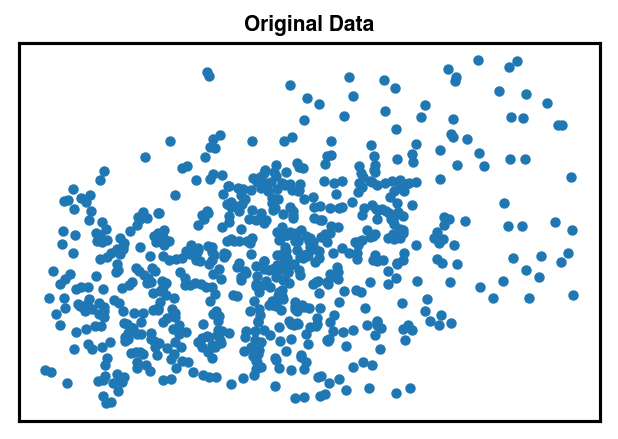

In [4]:
cgf.cfig(1)
plt.plot(M[:,0],M[:,1],'.',markersize = 8)

plt.xticks([])
plt.yticks([])
yvals = plt.ylim()
xvals = plt.xlim()

plt.title('Original Data')
plt.show()

### Perform k-means clustering with k=20 and k=4
Now I'm going to pretend I don't know where my data comes from and I'm going to perform k-means clustering using a k=20 and a k=4 and see what comes out.

Note that most of the code below is just to plots the results. The "magic" happens in two lines.

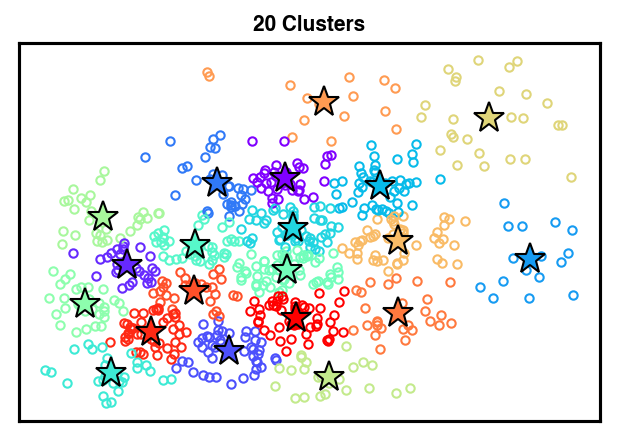

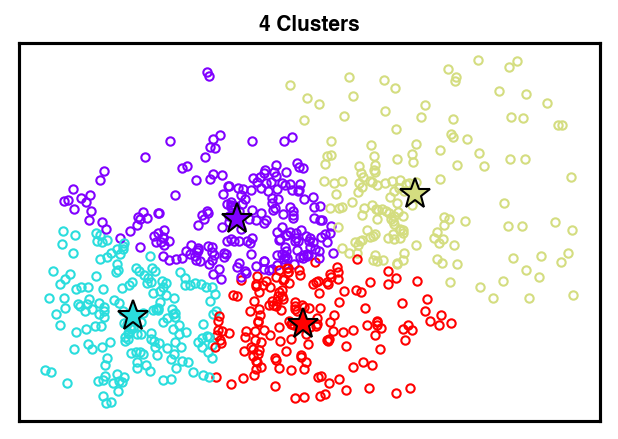

In [5]:
for NUM_CLUSTERS in [20,4]:
   
    #--------- kmeans magic-------------------------
    centroids, _ = kmeans(M, NUM_CLUSTERS, iter=20)
    idx, _ = vq(M,centroids)
    #-----------------------------------------------
    
    COLOR_MAT = cm.rainbow(np.linspace(0, 1, NUM_CLUSTERS))
    
    cgf.cfig(i)
    plt.title(str(NUM_CLUSTERS) + ' Clusters')
        
    for (ind,val) in enumerate(M):
        plt.plot(val[0],val[1],'.',color = COLOR_MAT[idx[ind]], markersize = 8, markerfacecolor = 'none')
    
    for (ind,val) in enumerate(centroids):
        plt.plot(val[0],val[1],'*',color = COLOR_MAT[ind],markersize = 15,markeredgecolor = 'black')
        
    plt.xticks([])
    plt.yticks([])
        
    plt.xlim(xvals)
    plt.ylim(yvals)    
    plt.show()

The figures above show the resulting final clusters using k=20 and k=4. As in other examples, the stars denote the final cluster centers and the data points are colored according to which cluster/center they are assigned to. Note that both give answers that *could* be reasonable, and it is up to me as a scientist to decide which is useful/physical/meaningful.